# ICT1508C Applied Statistics

*Inferential Statistics Using Python*

>Filename:     &emsp;&emsp;`ICT1508C_Topic06-5_Py-Inferential-Stats_Lesson_v2025-1.3.ipynb`<br>
>Version:      &emsp;&emsp;&ensp; `2025-1.3`<br>
>Description:  &ensp;&ensp;Jupyter notebook for ICT1508C lesson on Inferential Statistics Using Python.<br>
>Module:       &emsp;&emsp;&ensp;ICT1508C<br>
>Type:         &emsp;&emsp;&emsp;&ensp; Lesson<br>
>Prepared by:  &ensp;Nicholas H L Wong<br>
>Organisation: &nbsp;Singapore Institute of Technology<br>
>Division:     &emsp;&emsp;&ensp;Infocomm Technology<br>
>Attribution:  &emsp;Copyright &copy; 2025 Nicholas H L Wong – All Rights Reserved<br>

## Setup

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Sampling and Sampling Distributions

A feature in a population is normally distributed and has a mean of 85 and a standard deviation of 9. You select a random sample of size 13.

In [3]:
mu = 85
sigma = 9
n = 13

#### Q: Plot the sampling distribution.

Recall that according to the central limit theorem, the sample mean and sample standard deviation are respectively related to the population mean and population standard deviation by
$$
    \overline{x} = \mu,\quad s = \frac{\sigma}{\sqrt{n}}.
$$

Even though $n$ is small, we know that the sampling distribution with be normal because the population is normally distributed.

In [4]:
xbar = mu                           # Sample mean
s = sigma / np.sqrt(n)              # Sample standard deviation

# Create the distribution.
# Remember that `scale` is standard deviation, not variance.
sampling_dist = stats.norm(loc=xbar, scale=s)

x_arr = np.linspace(xbar-6*s, xbar+6*s, 1000)       # Array of values of the random variable (for plotting)

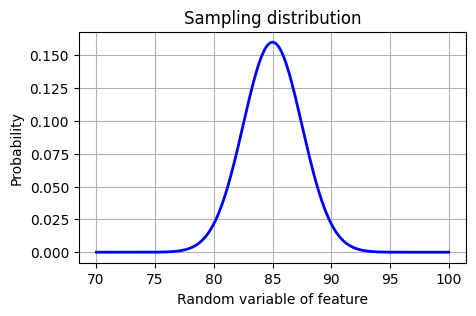

In [5]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot the probability distribution
ax.plot(x_arr, sampling_dist.pdf(x_arr), 'b-', lw=2)
ax.set_xlabel('Random variable of feature')
ax.set_ylabel('Probability')
ax.set_title('Sampling distribution')
ax.grid()
plt.show()

#### Q: Calculate the probability that the sample mean is less than 80.

In [6]:
x = 80
pr = sampling_dist.cdf(x)
pr

np.float64(0.022584134277520432)

#### Q: Calculate the probability that the sample mean is at least 89.

In [7]:
x = 89
pr = 1 - sampling_dist.cdf(x)
pr

np.float64(0.054526163824265006)

#### Q: Calculate the probability that the sample mean is between 80 and 89.

In [8]:
x1, x2 = 80, 89
pr = np.diff(sampling_dist.cdf([x1, x2])).item()
pr

0.9228897018982145

#### Q: What is the maximum value of the feature, below which are 15% of observations?

In [9]:
pr = 0.15
sampling_dist.ppf(pr)

np.float64(82.41290587963037)

## Confidence Intervals

Mrs Kenobi is concerned about absenteeism among her bakery workers at various locations. She takes a sample 10 workers and finds the following numbers of days absent: 4, 1, 2, 2, 1, 2, 2, 1, 0, 3. She wants to determine the 95% confidence interval for the mean number of absent days of all workers.

In [10]:
x_arr = np.array([4, 1, 2, 2, 1, 2, 2, 1, 0, 3])
n = len(x_arr)
CL = 0.95
alpha = 1 - CL

In [11]:
xbar = x_arr.mean()
s = x_arr.std(ddof=1)

#### Q: Determine the 95% confidence interval, *assuming that the population is normally distributed*.

Since the population is normally distributed, we can assume that the sample is also normally distributed, regardless of the sample size.

In [12]:
z_dist = stats.norm(loc=xbar, scale=s/np.sqrt(n))       # Normal distribution
z_dist.interval(CL)                                     # Confidence interval

(np.float64(1.0963513951469193), np.float64(2.5036486048530806))

We can also manually calculate the confidence interval:
$$
    \overline{x} \pm z_{\alpha/2}\frac{s}{\sqrt{n}}.
$$

In [13]:
z = stats.norm.ppf(1-alpha/2)
E = z*s/np.sqrt(n)                  # Margin of error
(xbar-E, xbar+E)

(np.float64(1.0963513951469193), np.float64(2.5036486048530806))

#### Q: Determine the 95% confidence interval, *without assuming anything about the population distribution*.

Since we do not know what the population distribution is, we will base our sampling distribution according to the sample size. Given the small sample size, we model the sample with a t distribution.

In [14]:
t_dist = stats.t(df=n-1, loc=xbar, scale=s/np.sqrt(n))  # t distribution
t_dist.interval(CL)

(np.float64(0.9878607238927247), np.float64(2.6121392761072753))

We can also manually calculate the confidence interval:
$$
    \overline{x} \pm t_{\alpha/2,\,\mathrm{df}}\frac{s}{\sqrt{n}}.
$$

In [15]:
t = stats.t.ppf(1-alpha/2, df=n-1)
E = t*s/np.sqrt(n)
(xbar-E, xbar+E)

(np.float64(0.9878607238927246), np.float64(2.6121392761072757))

## Hypothesis Testing

### One Sample | Small Sample Size

A toy designer wants to determine the average time taken for an adult to assemble a toy. 24 people were randomly chosen to assemble the toy and the times taken (in minutes) were as follows:

17, 13, 18, 19, 17, 21, 29, 22, 16, 28, 21, 15, 26, 23, 24, 20, 8, 17, 17, 21, 32, 18, 25, 22

In [16]:
x_arr = np.array([17, 13, 18, 19, 17, 21, 29, 22, 16, 28, 21, 15, 26, 23, 24, 20, 8, 17, 17, 21, 32, 18, 25, 22])
n = len(x_arr)                          # Sample size

#### Q: Use hypothesis testing to infer whether the average time for an adult to assemble the toy is more than 18 minutes, with a 5% significance level.

In [17]:
mu_0 = 18
alpha = 0.05                            # Significance level

We formulate the null and alternative hypotheses:
$$
  \begin{align*}
    H_0\, &:\, \mu \leq 18 \\
    H_a\, &:\, \mu > 18
  \end{align*}
$$

Perform the test:

In [18]:
test = stats.ttest_1samp(x_arr, popmean=mu_0, alternative='greater')
test

TtestResult(statistic=np.float64(2.169337877760375), pvalue=np.float64(0.020319811526100403), df=np.int64(23))

In [19]:
test.pvalue < alpha

np.True_

Since $p\approx0.0203 < \alpha=0.05$, we reject $H_0$ in favour of $H_a$.

At the 5% significance level, the average time for an adult to assemble the toy is more than 18 minutes.

We can also manually work this out. First, we calculate the $t$-statistic:
$$
  t = \frac{\overline{x}-\mu_0}{\frac{s}{\sqrt{n}}}
$$

In [20]:
t = (x_arr.mean()-mu_0) / (x_arr.std(ddof=1)/np.sqrt(n))
t

np.float64(2.1693378777603747)

Next, we find the critical $t$-value accoring to the significance level and degrees of freedom. *This would be analogous to looking up the t table.*

In [21]:
t_c = stats.t.ppf(1-alpha, df=n-1)      # Right-tailed
t_c

np.float64(1.7138715277470473)

In [22]:
t > t_c

np.True_

Since $t > t_c$, we are in the (right-tailed) rejection region. So, we reject $H_0$ in favour of $H_a$ (arriving at the same conclusion).

#### Q: Use hypothesis testing to infer whether the average time for an adult to assemble the toy is less than 20 minutes, with a 1% significance level.

In [23]:
mu_0 = 20
alpha = 0.01                            # Significance level

We formulate the null and alternative hypotheses:
$$
  \begin{align*}
    H_0\, &:\, \mu \geq 20 \\
    H_a\, &:\, \mu < 20
  \end{align*}
$$

Perform the test:

In [24]:
test = stats.ttest_1samp(x_arr, popmean=mu_0, alternative='less')
test

TtestResult(statistic=np.float64(0.34252703333058554), pvalue=np.float64(0.6324675762961243), df=np.int64(23))

In [25]:
test.pvalue < alpha

np.False_

Since $p\approx0.6325 > \alpha=0.01$, we fail to reject $H_0$.

At the 1% significance level, there is insufficient evidence that the average time for an adult to assemble the toy is less than 20 minutes.

We can also manually work this out. First, we calculate the $t$-statistic:
$$
  t = \frac{\overline{x}-\mu_0}{\frac{s}{\sqrt{n}}}
$$

In [26]:
t = (x_arr.mean()-mu_0) / (x_arr.std(ddof=1)/np.sqrt(n))
t

np.float64(0.34252703333058543)

Next, we find the critical $t$-value accoring to the significance level and degrees of freedom.

In [27]:
t_c = stats.t.ppf(alpha, df=n-1)        # Left-tailed
t_c

np.float64(-2.4998667394943985)

In [28]:
t < t_c

np.False_

Since $t \nless t_c$, we are **not** in the (left-tailed) rejection region. So, we fail to reject $H_0$ (arriving at the same conclusion).

### Two Samples From the Same Population | Small Sample Size

The following data were obtained in an experiment to verify whether there is a systematic difference in rock weights obtained with two scales:

| Rock specimen | Scale 1 (g) | Scale 2 (g) |
| -: | -: | -: |
| 1 | 12.13 | 12.17 |
| 2 | 17.56 | 17.61 |
| 3 | 9.33 | 9.35 |
| 4 | 11.4 | 11.42 |
| 5 | 28.62 | 28.61 |
| 6 | 10.25 | 10.27 |
| 7 | 23.37 | 23.42 |
| 8 | 16.27 | 16.26 |

#### Q: Use a 1% level of significance to test whether the difference between the means of the weights obtained with the two scales is significant.

In [29]:
x1_arr = np.array([12.13, 17.56, 9.33, 11.4, 28.62, 10.25, 23.37, 16.27])
x2_arr = np.array([12.17, 17.61, 9.35, 11.42, 28.61, 10.27, 23.42, 16.26])
alpha = 0.01                            # Significance level

We formulate the null and alternative hypotheses:
$$
  \begin{align*}
    H_0\, &:\, \mu_d = 0 \\
    H_a\, &:\, \mu_d \neq 0
  \end{align*}
$$

Perform the test. Here we do a **paired difference** test:

In [30]:
test = stats.ttest_rel(x1_arr, x2_arr, alternative='two-sided')
test

TtestResult(statistic=np.float64(-2.679032510044129), pvalue=np.float64(0.031583504186855314), df=np.int64(7))

In [31]:
test.pvalue < alpha

np.False_

Since $p\approx0.0316 > \alpha=0.01$, we fail to reject $H_0$.

At the 1% significance level, there is insufficient evidence that the difference between the means of the weights obtained with the two scales is statistically significant.

We can also equivalently do a **one-sample** test on the difference between the sample means. First, we get the differences:

In [32]:
d_arr = x1_arr - x2_arr
n = len(d_arr)                          # Sample size
d_arr

array([-0.04, -0.05, -0.02, -0.02,  0.01, -0.02, -0.05,  0.01])

Then, we perform the test:

In [33]:
stats.ttest_1samp(d_arr, popmean=0, alternative='two-sided')

TtestResult(statistic=np.float64(-2.679032510044129), pvalue=np.float64(0.031583504186855314), df=np.int64(7))

The result is the same.

We can also manually work this out. We find the mean of the difference in sample means, either by using NumPy's `mean()` method:


In [34]:
dbar = d_arr.mean()
dbar

np.float64(-0.022499999999999964)

Or by using the formula:
$$
  \overline{d} = \frac{1}{n}\sum_{i=1}^{n}{d_i}.
$$

In [35]:
n = len(d_arr)
dbar = np.sum(d_arr)/n
dbar

np.float64(-0.022499999999999964)

We find the standard deviation of the difference in sample means, either by using NumPy's `std()` method:

In [36]:
s_d = d_arr.std(ddof=1)                 # Pay attention to specify that `ddof` = 1 for sample standard deviation
s_d

np.float64(0.023754698783308492)

Or by using the formula (this is the alternative formula for sample standard deviation):
$$
  s_d = \sqrt{\frac{1}{n-1}\left[\sum_{i=1}^{n}{d_i^2-\frac{\left(\sum_{i=1}^{n}{d_i}\right)^2}{n}}\right]}.
$$

In [37]:
s_d = np.sqrt((1/(n-1))*(np.sum(d_arr**2) - np.sum(d_arr)**2/n))
s_d

np.float64(0.023754698783308492)

We calculate the $t$-statistic:
$$
  t = \frac{\overline{d}-0}{\frac{s_d}{\sqrt{n}}}
$$

In [38]:
t = (dbar-0) / (s_d/np.sqrt(n))
t

np.float64(-2.6790325100441295)

Next, we find the critical $t$-value according to the significance level and degrees of freedom.

In [39]:
t_c = stats.t.ppf(alpha/2, df=n-1)      # Two-tailed
t_c

np.float64(-3.499483297350504)

In [40]:
np.abs(t) > np.abs(t_c)

np.False_

Since $\left|t\right| \ngtr \left|t_c\right|$, we are **not** in the (two-tailed) rejection region. So, we fail to reject $H_0$ (arriving at the same conclusion).

### One Sample | Large Sample Size

A sample of 36 observations is randomly selected from population. The sample mean is 49 and the sample standard deviation is 5.

In [41]:
n = 36
xbar = 49
s = 5

#### Q: Use hypothesis testing to infer whether the population mean is equal to 50, with a 5% significance level.

In [42]:
mu_0 = 50
alpha = 0.05                            # Significance level

We formulate the null and alternative hypotheses:
$$
  \begin{align*}
    H_0\, &:\, \mu = 50 \\
    H_a\, &:\, \mu \neq 50
  \end{align*}
$$

Perform the test. `scipy.stats` does not have a built-in z-test like `ttest_1samp()`. Nevertheless, we can proceed by manual calcultion.

First, we calculate the $z$-statistic:
$$
  z = \frac{\overline{x}-\mu_0}{\frac{s}{\sqrt{n}}}
$$

In [43]:
z = (xbar-mu_0) / (s/np.sqrt(n))
z

np.float64(-1.2)

Next, we find the critical $z$-value accoring to the significance level.

In [44]:
z_c = stats.norm.ppf(alpha/2)           # Two-tailed
z_c

np.float64(-1.9599639845400545)

In [45]:
np.abs(z) > np.abs(z_c)

np.False_

Since $\left|z\right| \ngtr \left|z_c\right|$, we are **not** in the (two-tailed) rejection region. So, we fail to reject $H_0$.

At the 5% significance level, there is insufficient evidence that the population mean is statistically significantly different from 50.

## Analysis of Variance (ANOVA)

### One-way ANOVA

The dataset `Historical24hrPSI.csv` contains hourly measurements of the Pollutant Standards Index (PSI) in various regions of Singapore from the beginning of 2014 till the end of 2022.

Ref.: https://beta.data.gov.sg/datasets/d_8a7850dc3993dc45f1620b9972c58d4d/view

In [46]:
# Read in dataset
data_psi = pd.read_csv("Historical24hrPSI.csv")
data_psi

,24-hr_psi,north,south,east,west,central
0,1/4/2014 1:00,55,54,54,58,54
1,1/4/2014 2:00,55,54,54,59,54
2,1/4/2014 3:00,55,55,54,60,55
3,1/4/2014 4:00,56,55,55,62,55
4,1/4/2014 5:00,57,55,56,63,56
...,...,...,...,...,...,...
76723,31/12/2022 20:00,30,46,56,34,47
76724,31/12/2022 21:00,30,45,56,33,46
76725,31/12/2022 22:00,30,46,56,33,45
76726,31/12/2022 23:00,30,45,56,33,45


In [47]:
data_psi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76728 entries, 0 to 76727
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   24-hr_psi  76728 non-null  object
 1   north      76728 non-null  int64 
 2   south      76728 non-null  int64 
 3   east       76728 non-null  int64 
 4   west       76728 non-null  int64 
 5   central    76728 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.5+ MB


#### Q: Perform a one-way ANOVA to determine if the average daily PSI readings for the various Singapore regions on 31 December 2022 (New Year's Eve) were statistically significantly different, at a significance level of 0.05.

In [48]:
alpha = 0.05                            # Significance level

We formulate the null and alternative hypotheses:
$$
  \begin{align*}
    H_0\, &:\, \mu_{\textsf{north}} = \mu_{\textsf{south}} = \mu_{\textsf{east}} = \mu_{\textsf{west}} = \mu_{\textsf{central}} \\
    H_a\, &:\, \textsf{at least one of the $\mu_j$ is different}
  \end{align*}
$$
where $\mu_j$ is the daily average PSI reading for region $j\in\left\{\textsf{north},\, \textsf{south},\, \textsf{east},\, \textsf{west},\, \textsf{central}\right\}$.

We need to first clean the data and filter it.

For explicit datetime formatting, refer to https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior for format codes.

In [49]:
data_psi['24-hr_psi'] = pd.to_datetime(data_psi['24-hr_psi'], dayfirst=True, format='mixed')            # Convert '24-hr_psi' column to datetime format
data_psi = data_psi[(data_psi['24-hr_psi']>"2022-12-30") & (data_psi['24-hr_psi']<="2022-12-31")]       # Filter by including only 2022-12-31
data_psi = data_psi.drop(columns=['24-hr_psi'])                                                         # Remove datetime column
data_psi

,north,south,east,west,central
76680,30,46,55,37,46
76681,30,45,55,36,48
76682,30,48,55,35,50
76683,30,47,55,37,50
76684,29,48,56,38,50
76685,29,50,56,38,49
76686,29,50,56,38,49
76687,30,51,56,37,48
76688,30,51,56,37,49
76689,30,52,56,36,49


We can use the `f_oneway()` function in `scipy.stats` to compute the ANOVA:

In [50]:
anova = stats.f_oneway(data_psi['north'], data_psi['south'], data_psi['east'], data_psi['west'], data_psi['central'])
anova

F_onewayResult(statistic=np.float64(1385.3347511312293), pvalue=np.float64(3.004192581621958e-96))

In [51]:
anova.pvalue < alpha

np.True_

Since $p\approx3.0042\times10^{-96} < \alpha=0.05$, we reject $H_0$ in favour of $H_a$.

At the 5% significance level, the average daily PSI reading on 31 December 2022 of at least one region in Singapore was statistically significantly different.

We can alternatively use the `anova_lm()` function from the `statsmodels` package. `anova_lm()` operates on a fitted linear model. So, we use the `ols()` function from `statsmodels` to create a linear regression model of our data.

Before we do that though, we need to reformat our data where the PSI readings are all in a single column and a second column indicates the region. This is because `ols()` expects the data in this format. We use the `melt()` method from `pandas` to do this.

Ref.: https://tidypython.com/how-to-do-one-way-anova-in-python/

In [52]:
data_psi_melt = data_psi.melt(var_name="Region", value_name="PSI")      # Melt region columns into one
data_psi_melt

,Region,PSI
0,north,30
1,north,30
2,north,30
3,north,30
4,north,29
...,...,...
115,central,51
116,central,51
117,central,51
118,central,51


To create our linear model, we invoke `ols()` and *regress* the `PSI` variable *onto* the `Region` variable, which is treated as a categorical variable by the function `C()`.

Then, we compute the ANOVA by supplying our model to the `anova_lm()` function. The benefit of this procedure is that in addition to the $F$ and $p$-value, we can also obtain the full ANOVA table.

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PSI ~ C(Region)', data=data_psi_melt).fit()                # Fit an ordinary least squares model
aov_table = sm.stats.anova_lm(model, typ=2)                             # Compute ANOVA table
print(aov_table)

                 sum_sq     df            F        PR(>F)
C(Region)  11092.716667    4.0  1385.334751  3.004193e-96
Residual     230.208333  115.0          NaN           NaN


In [54]:
aov_table['PR(>F)'].iloc[0] < alpha

np.True_

We get the same result and arrive at the same conclusion (rejecting $H_0$ in favour of $H_a$) as before.

## Summary

In this lesson, we covered how to use various packages in Python to do a number of inferential statistical analysis tasks in areas including
- Sampling and sampling distributions
- Confidence intervals
- Hypothesis testing
- ANOVA